### EDA

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [165]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset.csv") 
df_clean

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,True,0.0,Everyone,False,False,False
1,Lifestyle,0.0,0.0,True,0.0,Everyone,False,False,False
2,Shopping,4.3,918.0,True,0.0,Everyone,True,False,False
3,Finance,5.0,6.0,True,0.0,Everyone,False,False,False
4,Food & Drink,4.3,830.0,True,0.0,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...
9658,Music,0.0,0.0,True,0.0,Everyone,False,False,False
9659,Education,4.3,142.0,True,0.0,Everyone,False,False,False
9660,Music & Audio,5.0,9.0,True,0.0,Teen,True,False,False
9661,Entertainment,0.0,0.0,True,0.0,Everyone,True,False,False


In [166]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   bool   
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   bool   
 7   In App Purchases  9663 non-null   bool   
 8   Editors Choice    9663 non-null   bool   
dtypes: bool(4), float64(3), object(2)
memory usage: 415.3+ KB


### Step 1: Univariate Analysis

##### State clearly as part of your univariate analysis which one is your target columns, what type of data it is, and hence what type of machine learning problem you are facing.

Our target colums is Rating and it is the average rating of an applications. The data type of this column is a float. 

##### At the start of the univariate analysis, add a paragraph discussing why we should treat numerical and categorical variables separately when doing data exploration.

We are analysing our categorical and numerical data to understand them more and also to see how are they distibuted. 

#### Categorical

In [167]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


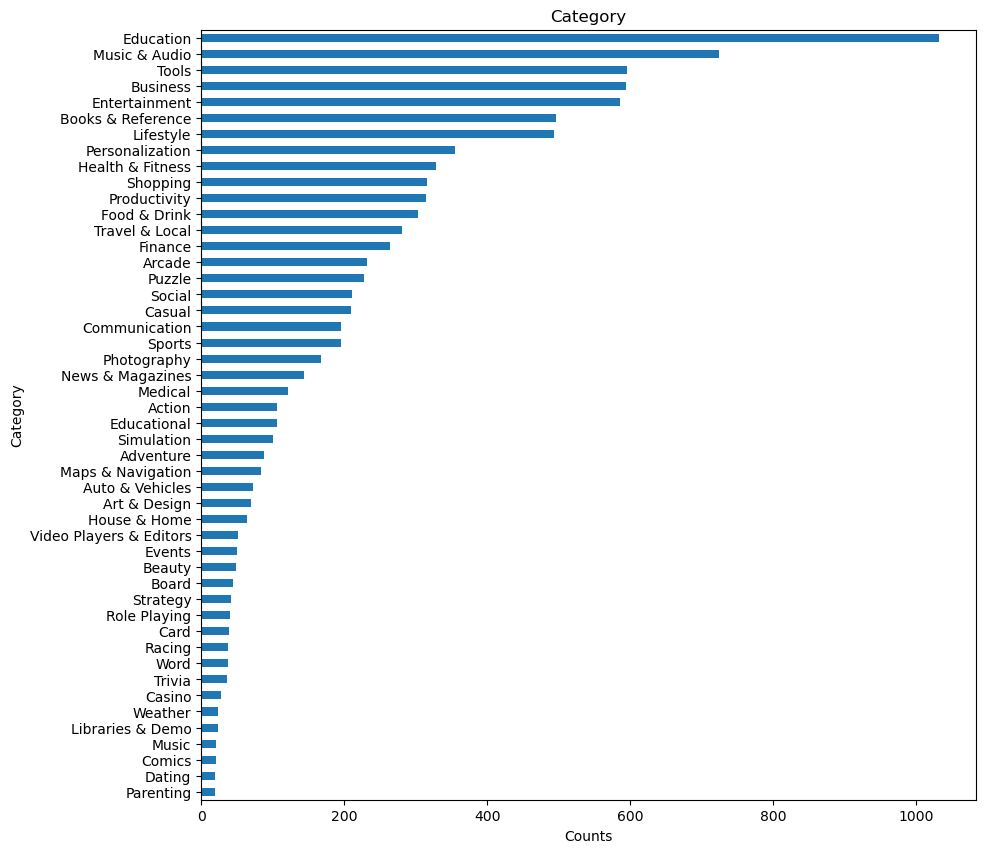

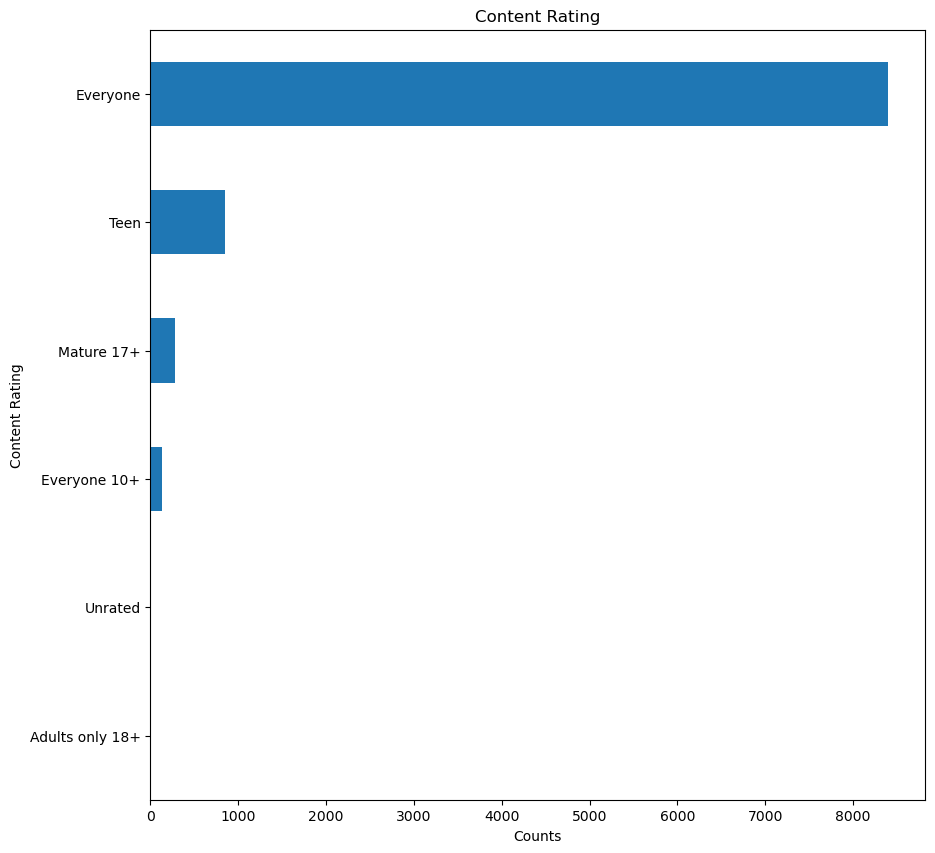

In [168]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there are lots application on Education, Tools, Music & Audio and Entertainment. There are fewer application on Libraries & Demo, Parenting, Musics and Comics.
Most of the applications is for everyone and there is less application for the other contant rating features. 

In [169]:
boolean_df = df_clean.select_dtypes('bool').copy()
boolean_df.head()

,Free,Ad Supported,In App Purchases,Editors Choice
0,True,False,False,False
1,True,False,False,False
2,True,True,False,False
3,True,False,False,False
4,True,True,False,False


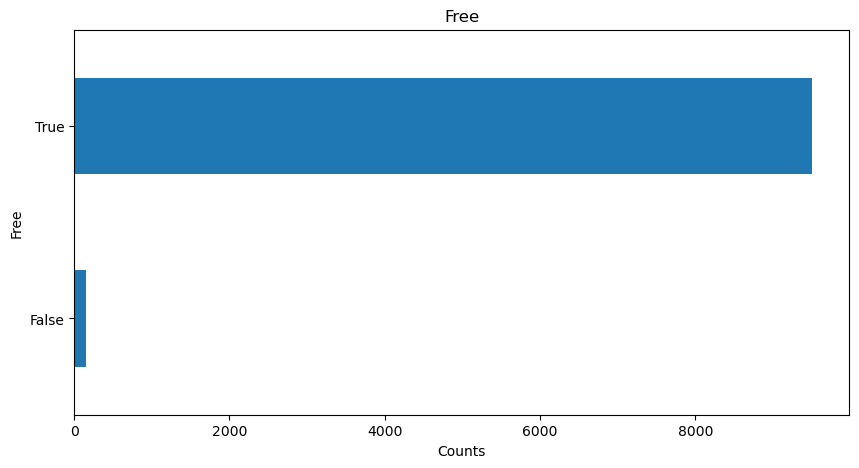

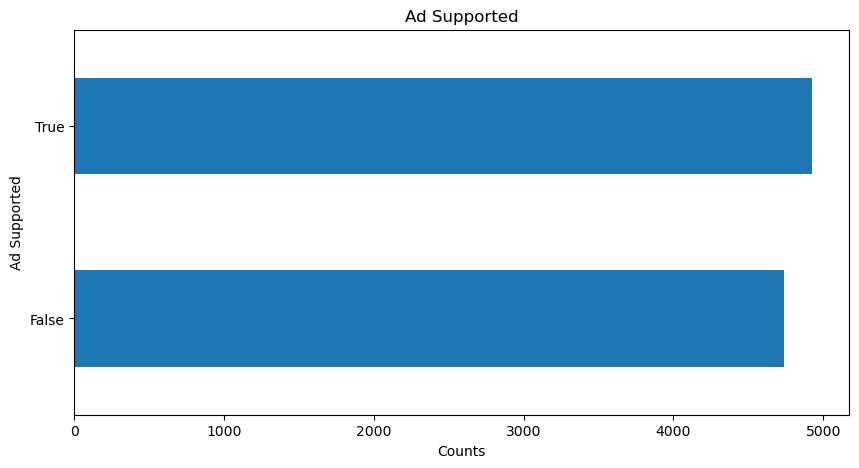

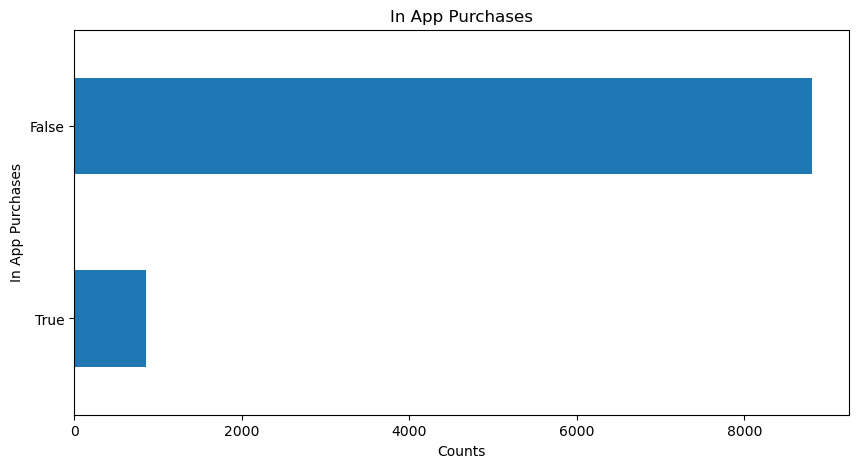

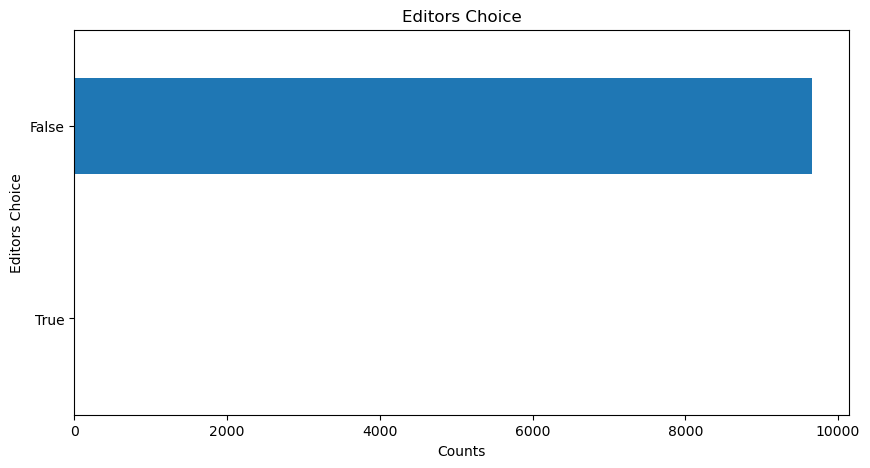

In [170]:
for column in boolean_df.columns:
    plt.figure(figsize=(10,5))
    boolean_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

There is a bit more of application ad supported compare to the non ad supported but there is not too much differece. 
Few application contain in app purchase but the majority does not have in app purchases 
None of the applications is editor choices. 

#### Numerical 

In [171]:
df_clean.describe()

,Rating,Rating Count,Price
count,9663.000000,9.663000e+03,9663.000000
mean,2.214695,1.423607e+03,0.109652
std,2.110918,2.387508e+04,3.087679
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,3.000000,6.000000e+00,0.000000
75%,4.300000,4.000000e+01,0.000000
max,5.000000,1.569485e+06,269.990000


In [172]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   bool   
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   bool   
 7   In App Purchases  9663 non-null   bool   
 8   Editors Choice    9663 non-null   bool   
dtypes: bool(4), float64(3), object(2)
memory usage: 415.3+ KB


In [174]:
numeric_df = df_clean.select_dtypes(['float64']).copy()
numeric_df.head()

,Rating,Rating Count,Price
0,3.9,68.0,0.0
1,0.0,0.0,0.0
2,4.3,918.0,0.0
3,5.0,6.0,0.0
4,4.3,830.0,0.0


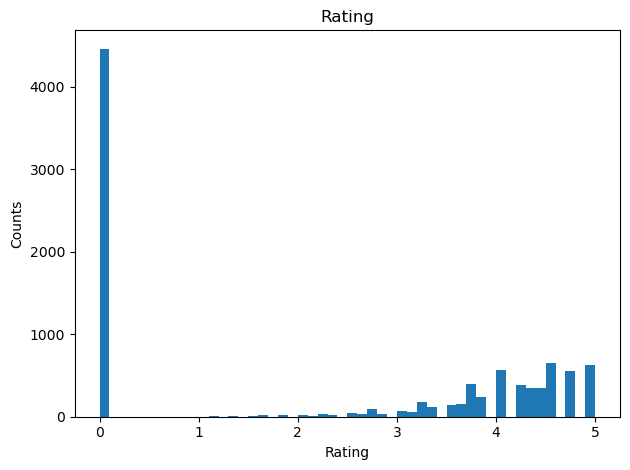

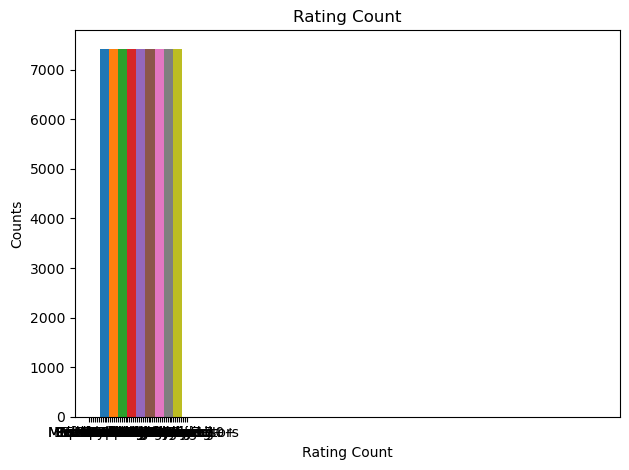

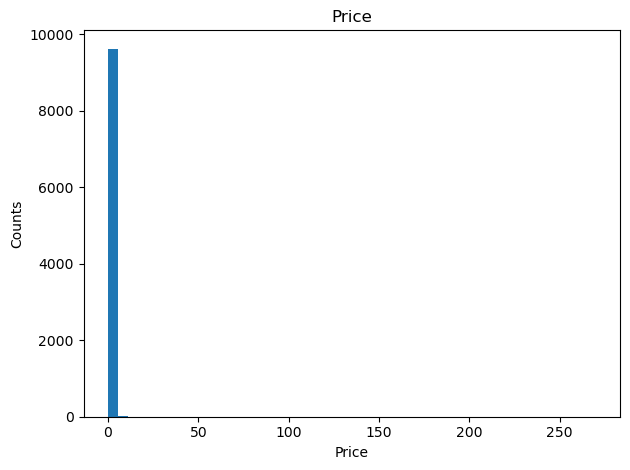

In [175]:
for column in numeric_df:
    plt.figure()
    if column == 'Rating Count':
        plt.hist(df_clean[df_clean[column] <50], bins=5)
    else:
        plt.hist(df_clean[column], bins=50)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0, meaning that those application are non rated as the minimum rating is 1. 
Most of the application are free

### Step 2: Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

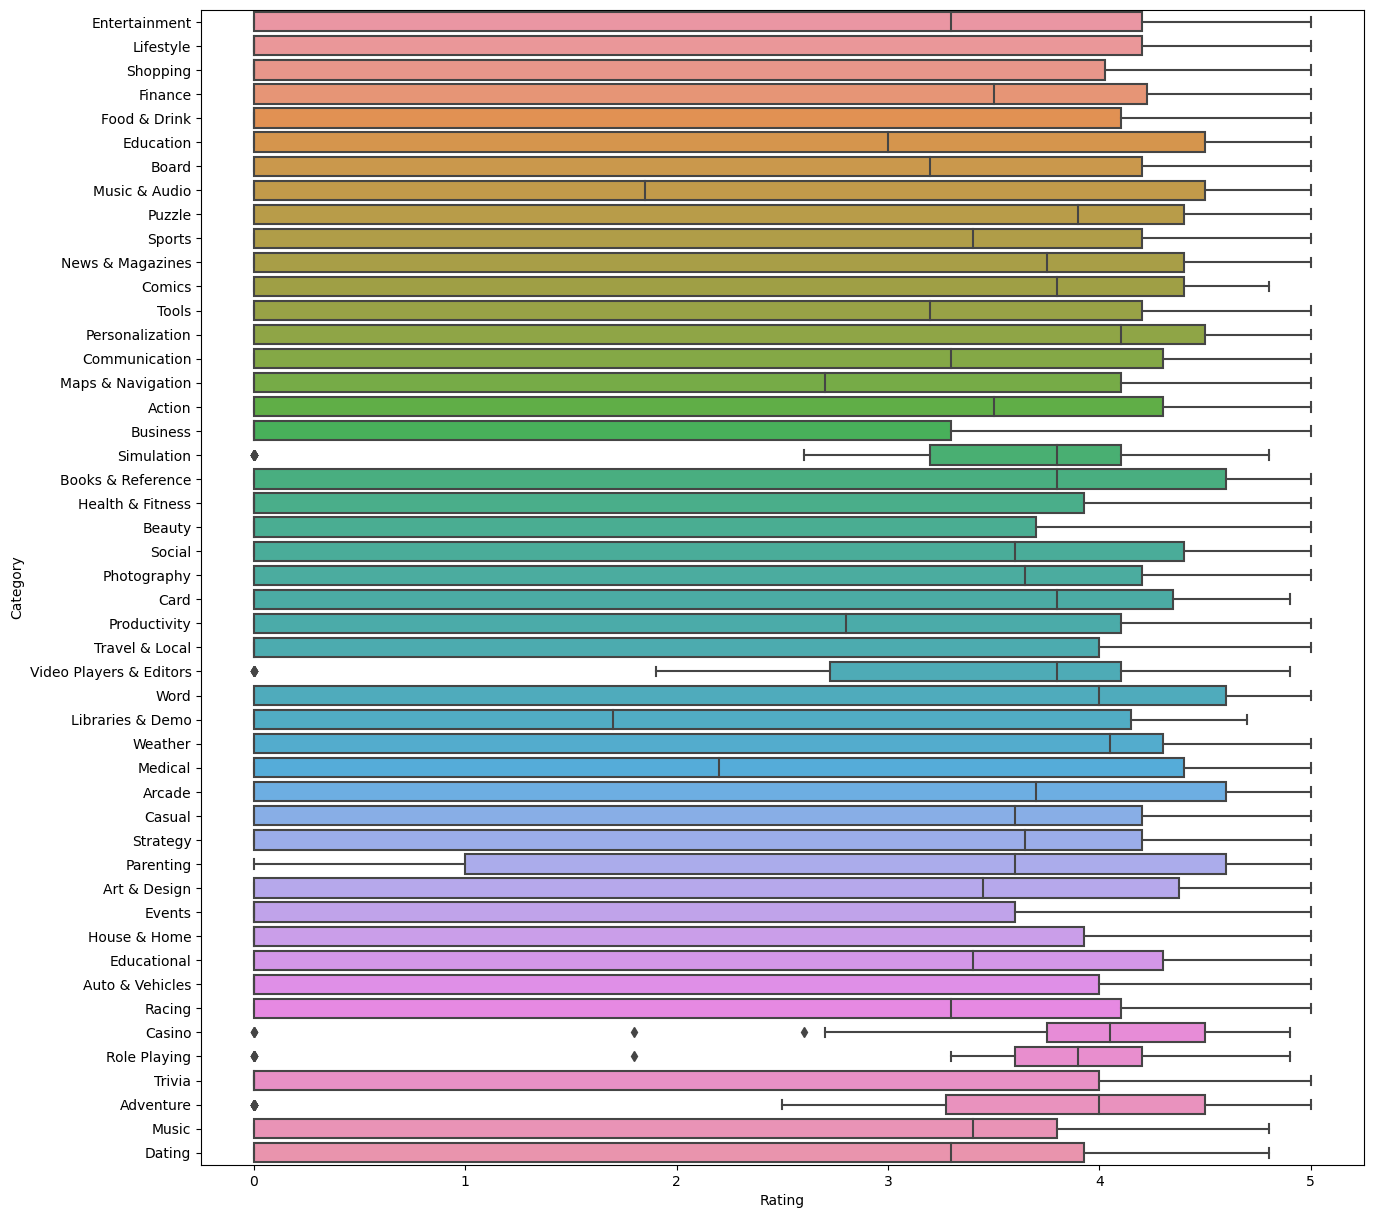

In [176]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Category')
plt.show()

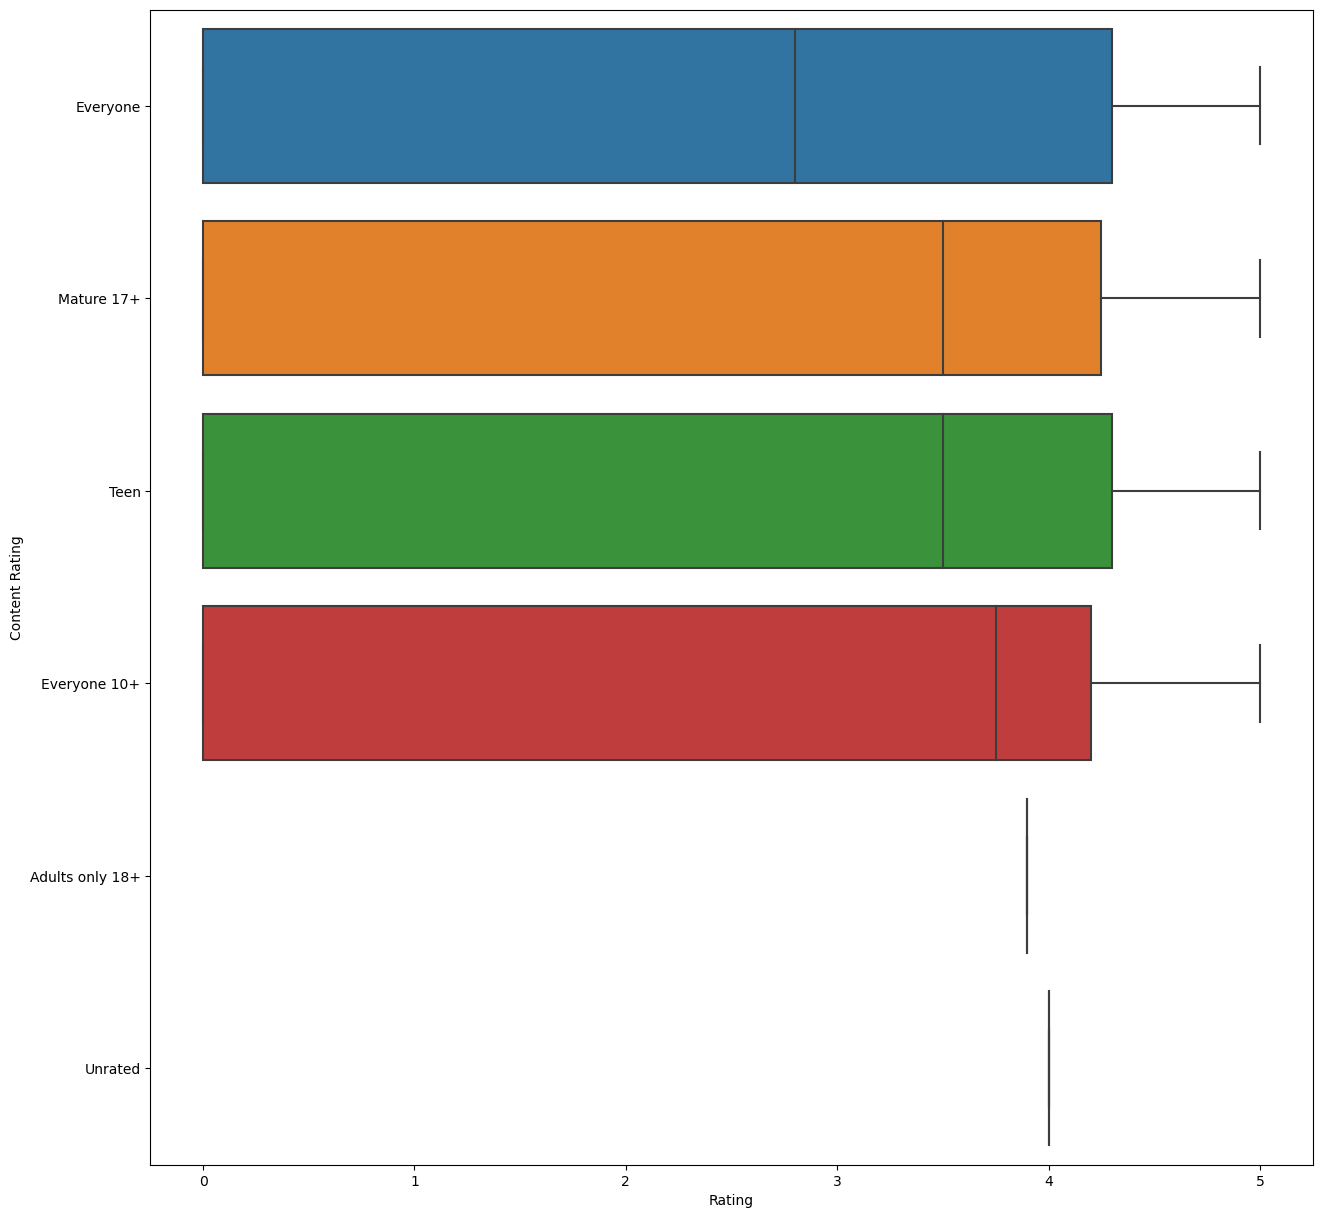

In [177]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Content Rating')
plt.show()

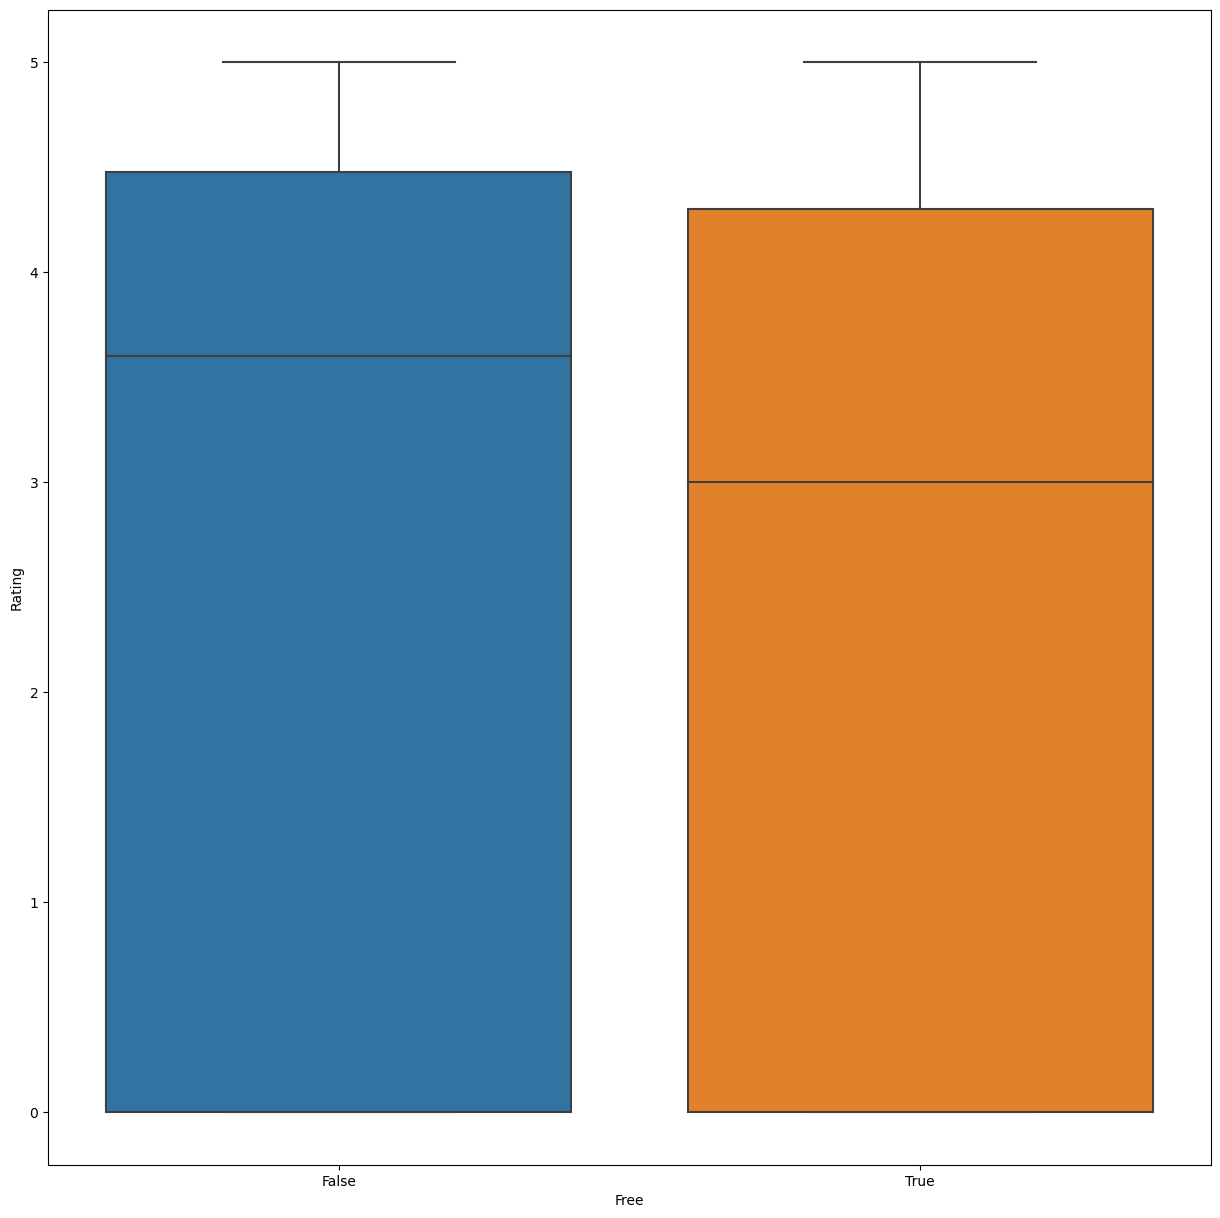

In [193]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, y = 'Rating', x= 'Free')
plt.show()

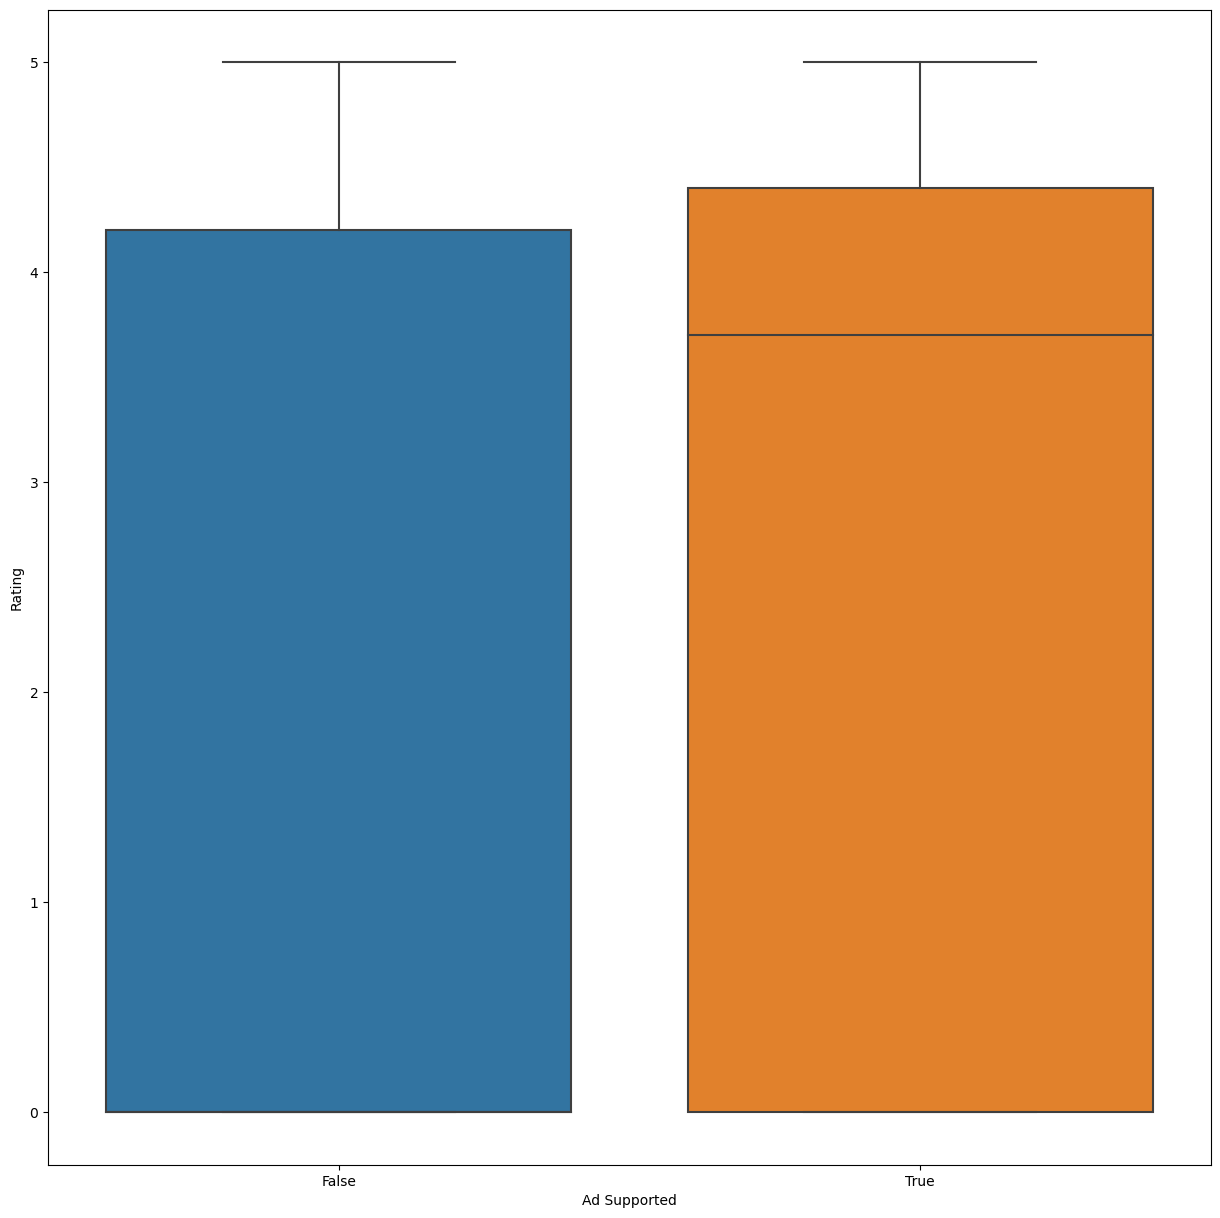

In [195]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, y = 'Rating', x= 'Ad Supported')
plt.show()

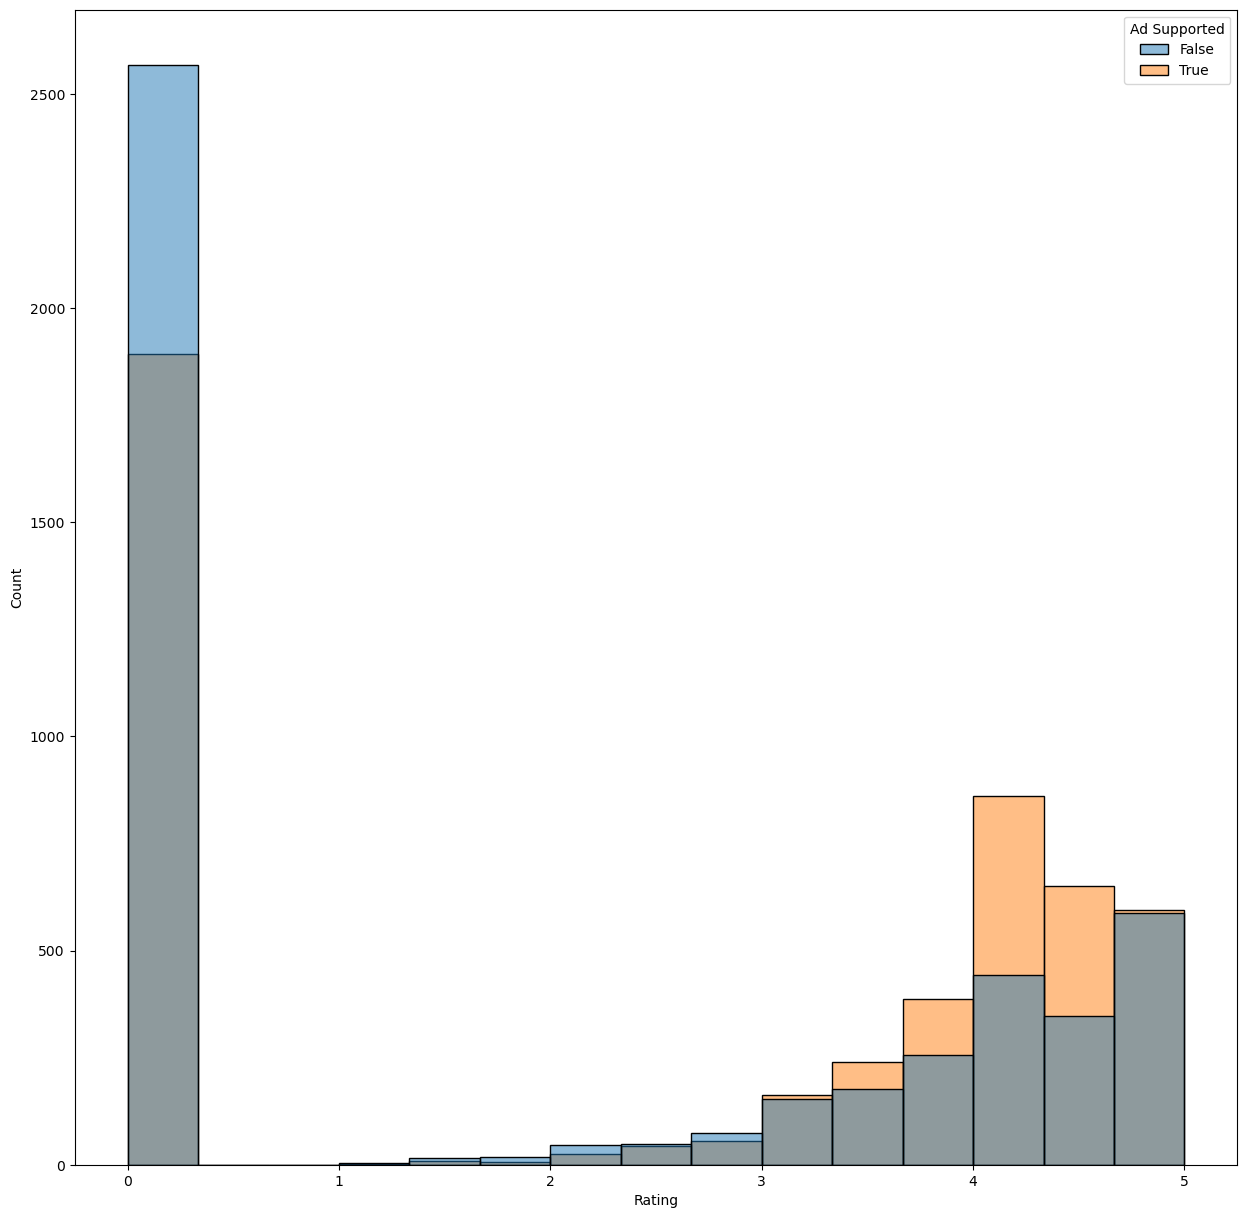

In [194]:
plt.figure(figsize = (15, 15) )
sns.histplot(data = df_clean, x= 'Rating', hue = 'Ad Supported')
plt.show()

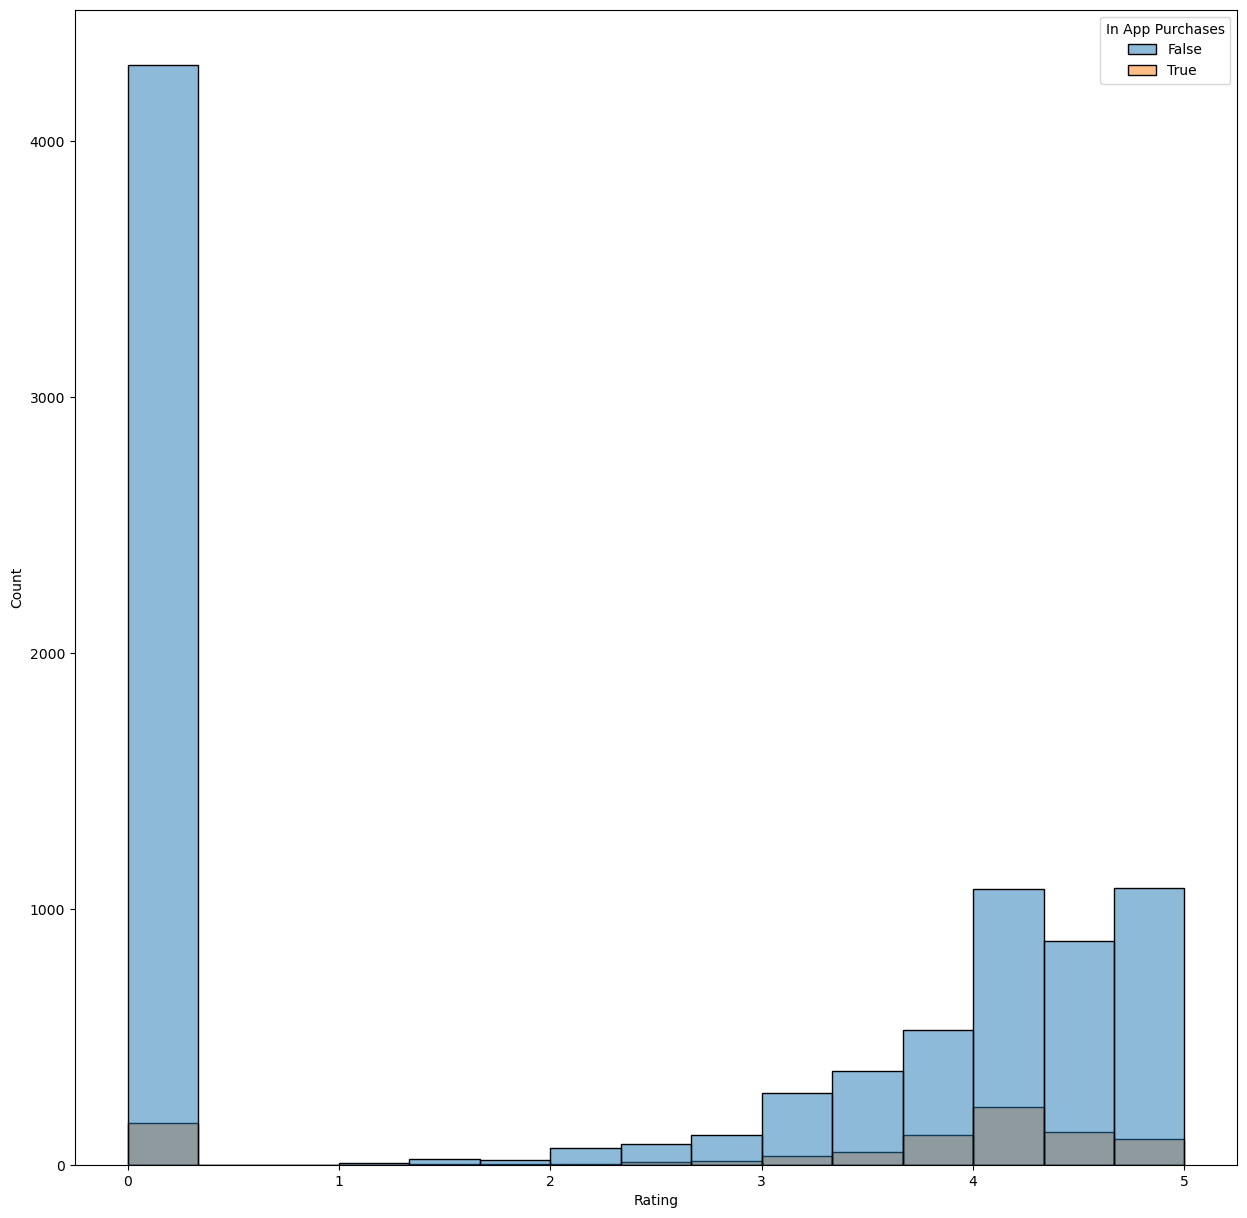

In [196]:
plt.figure(figsize = (15, 15) )
sns.histplot(data = df_clean, x= 'Rating', hue = 'In App Purchases')
plt.show()

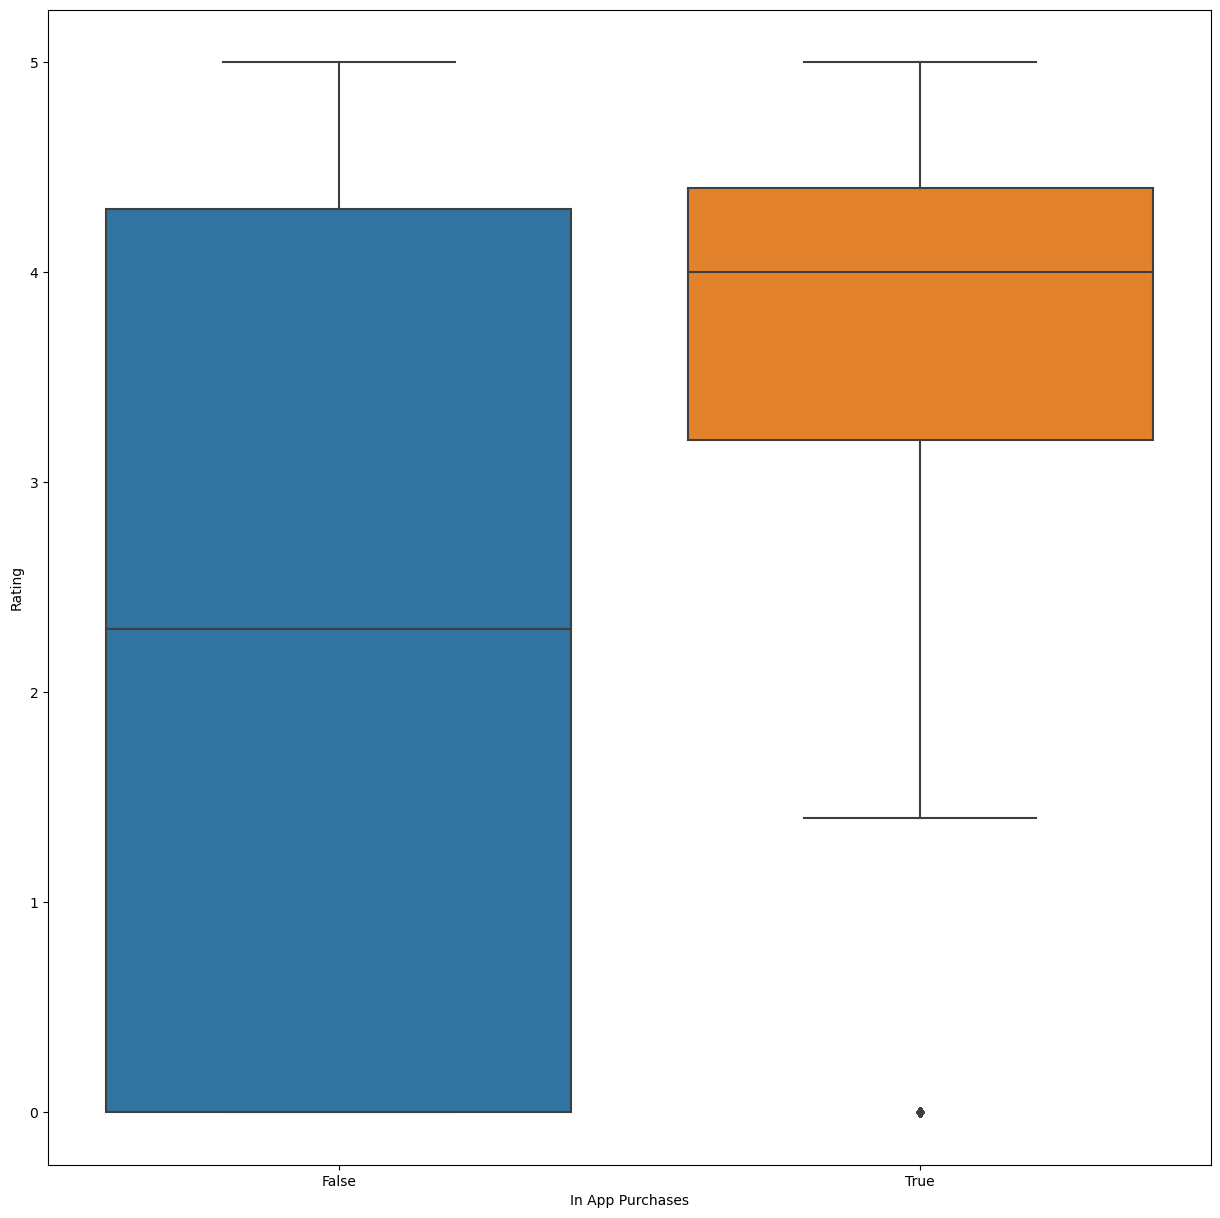

In [197]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, y = 'Rating', x= 'In App Purchases')
plt.show()

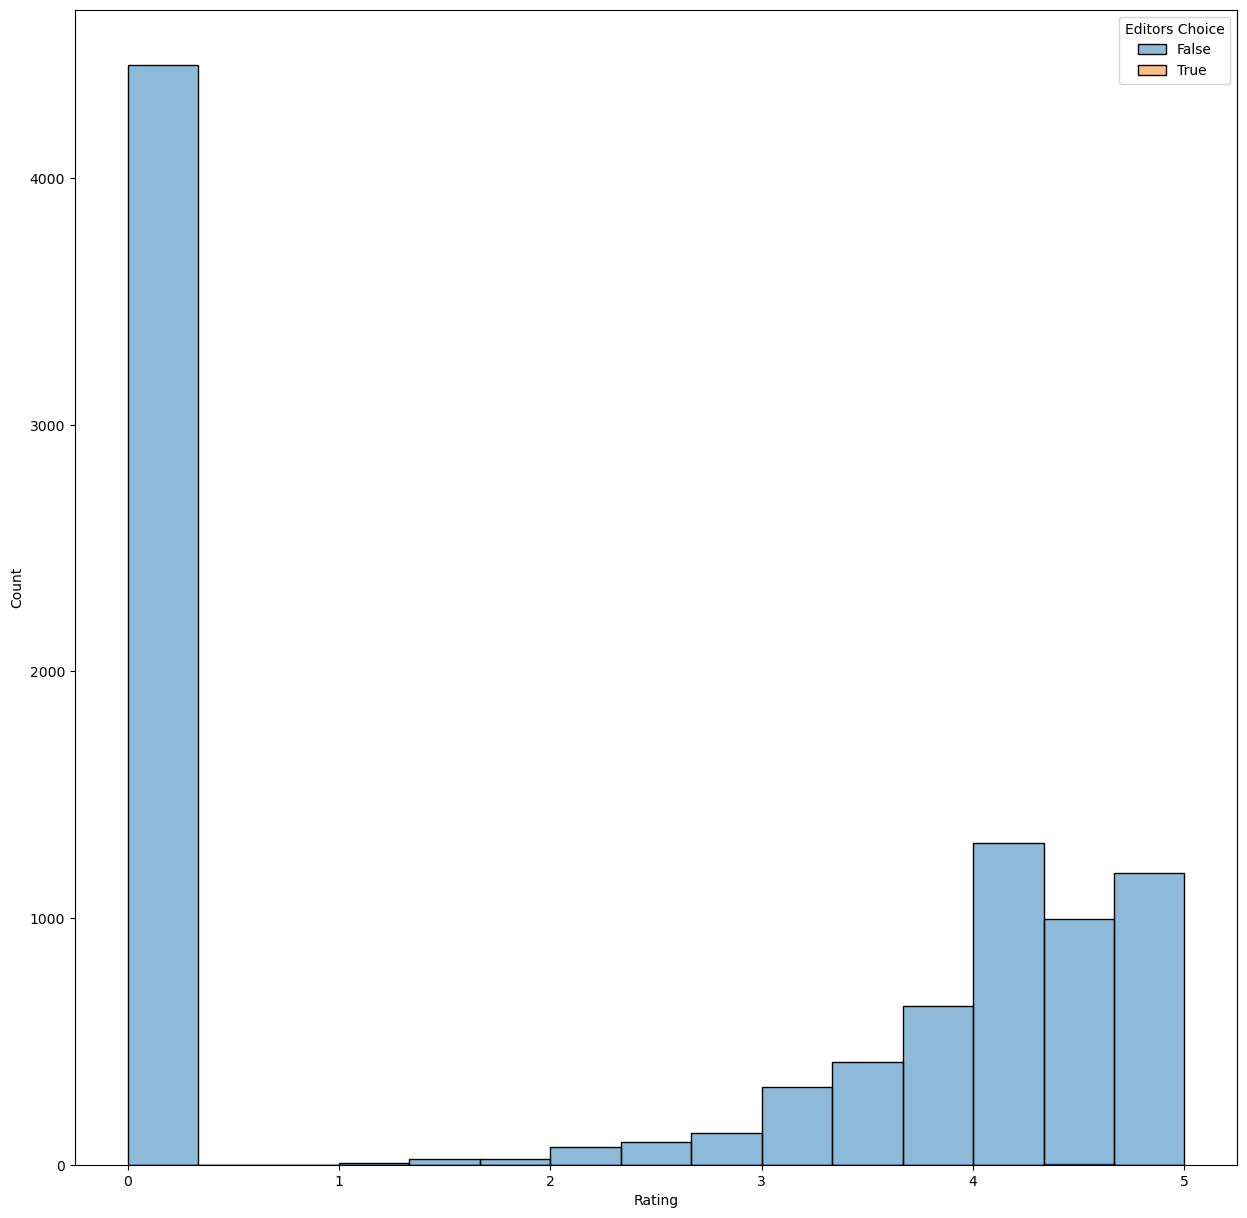

In [198]:
plt.figure(figsize = (15, 15) )
sns.histplot(data = df_clean, x= 'Rating', hue = 'Editors Choice')
plt.show()

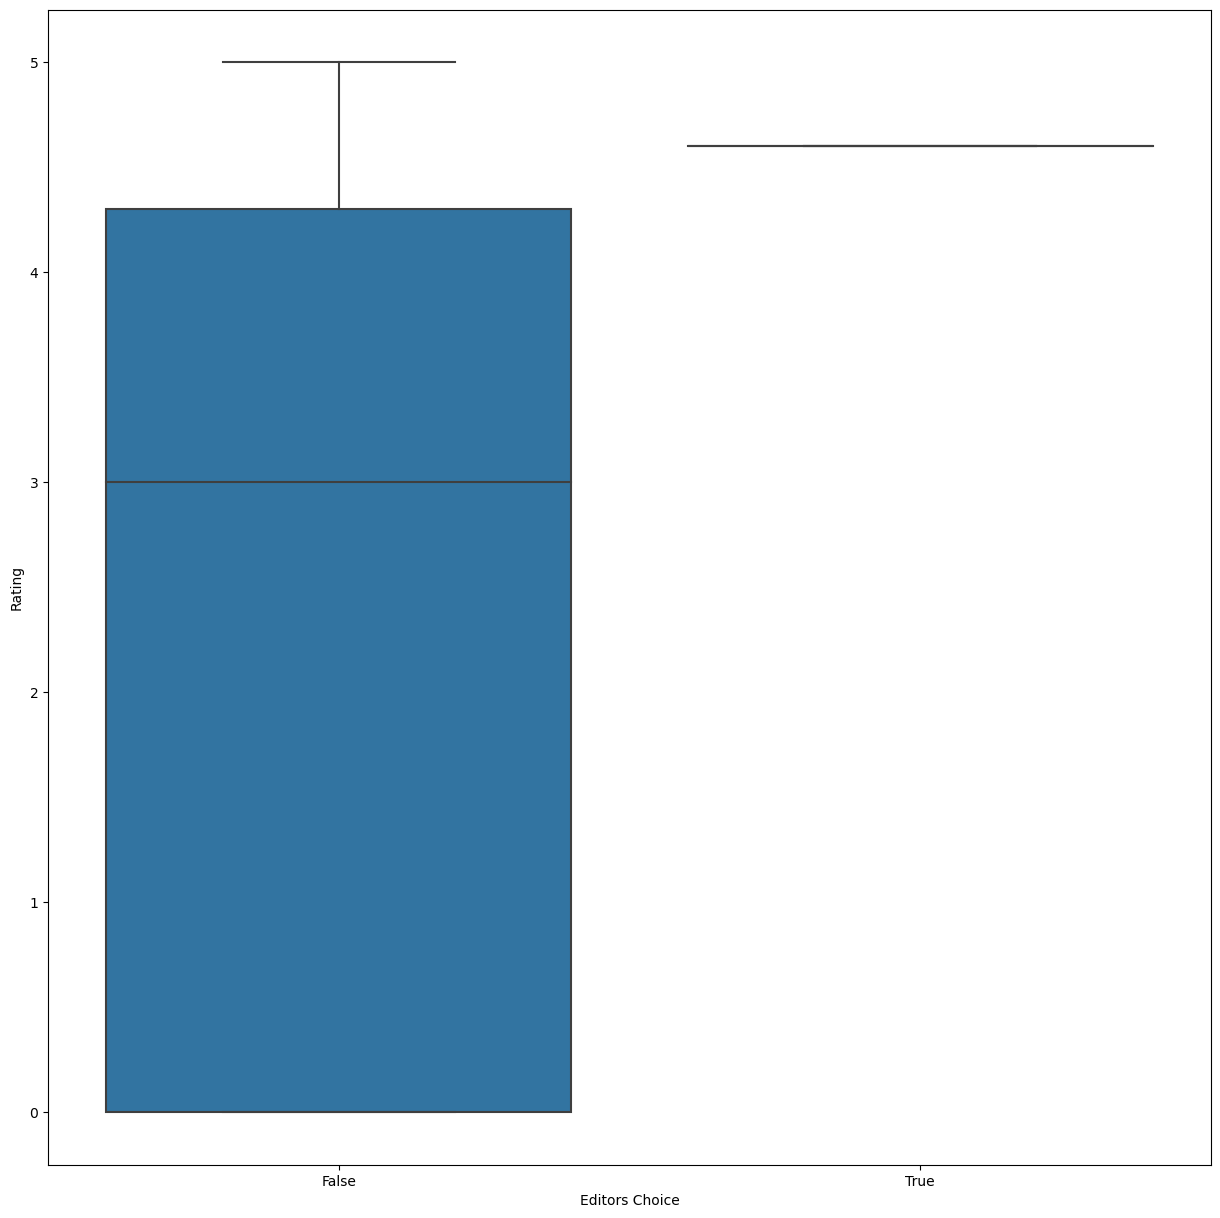

In [199]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, y = 'Rating', x= 'Editors Choice')
plt.show()

In [ ]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Editors Choice')
plt.show()

#### Numerical

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


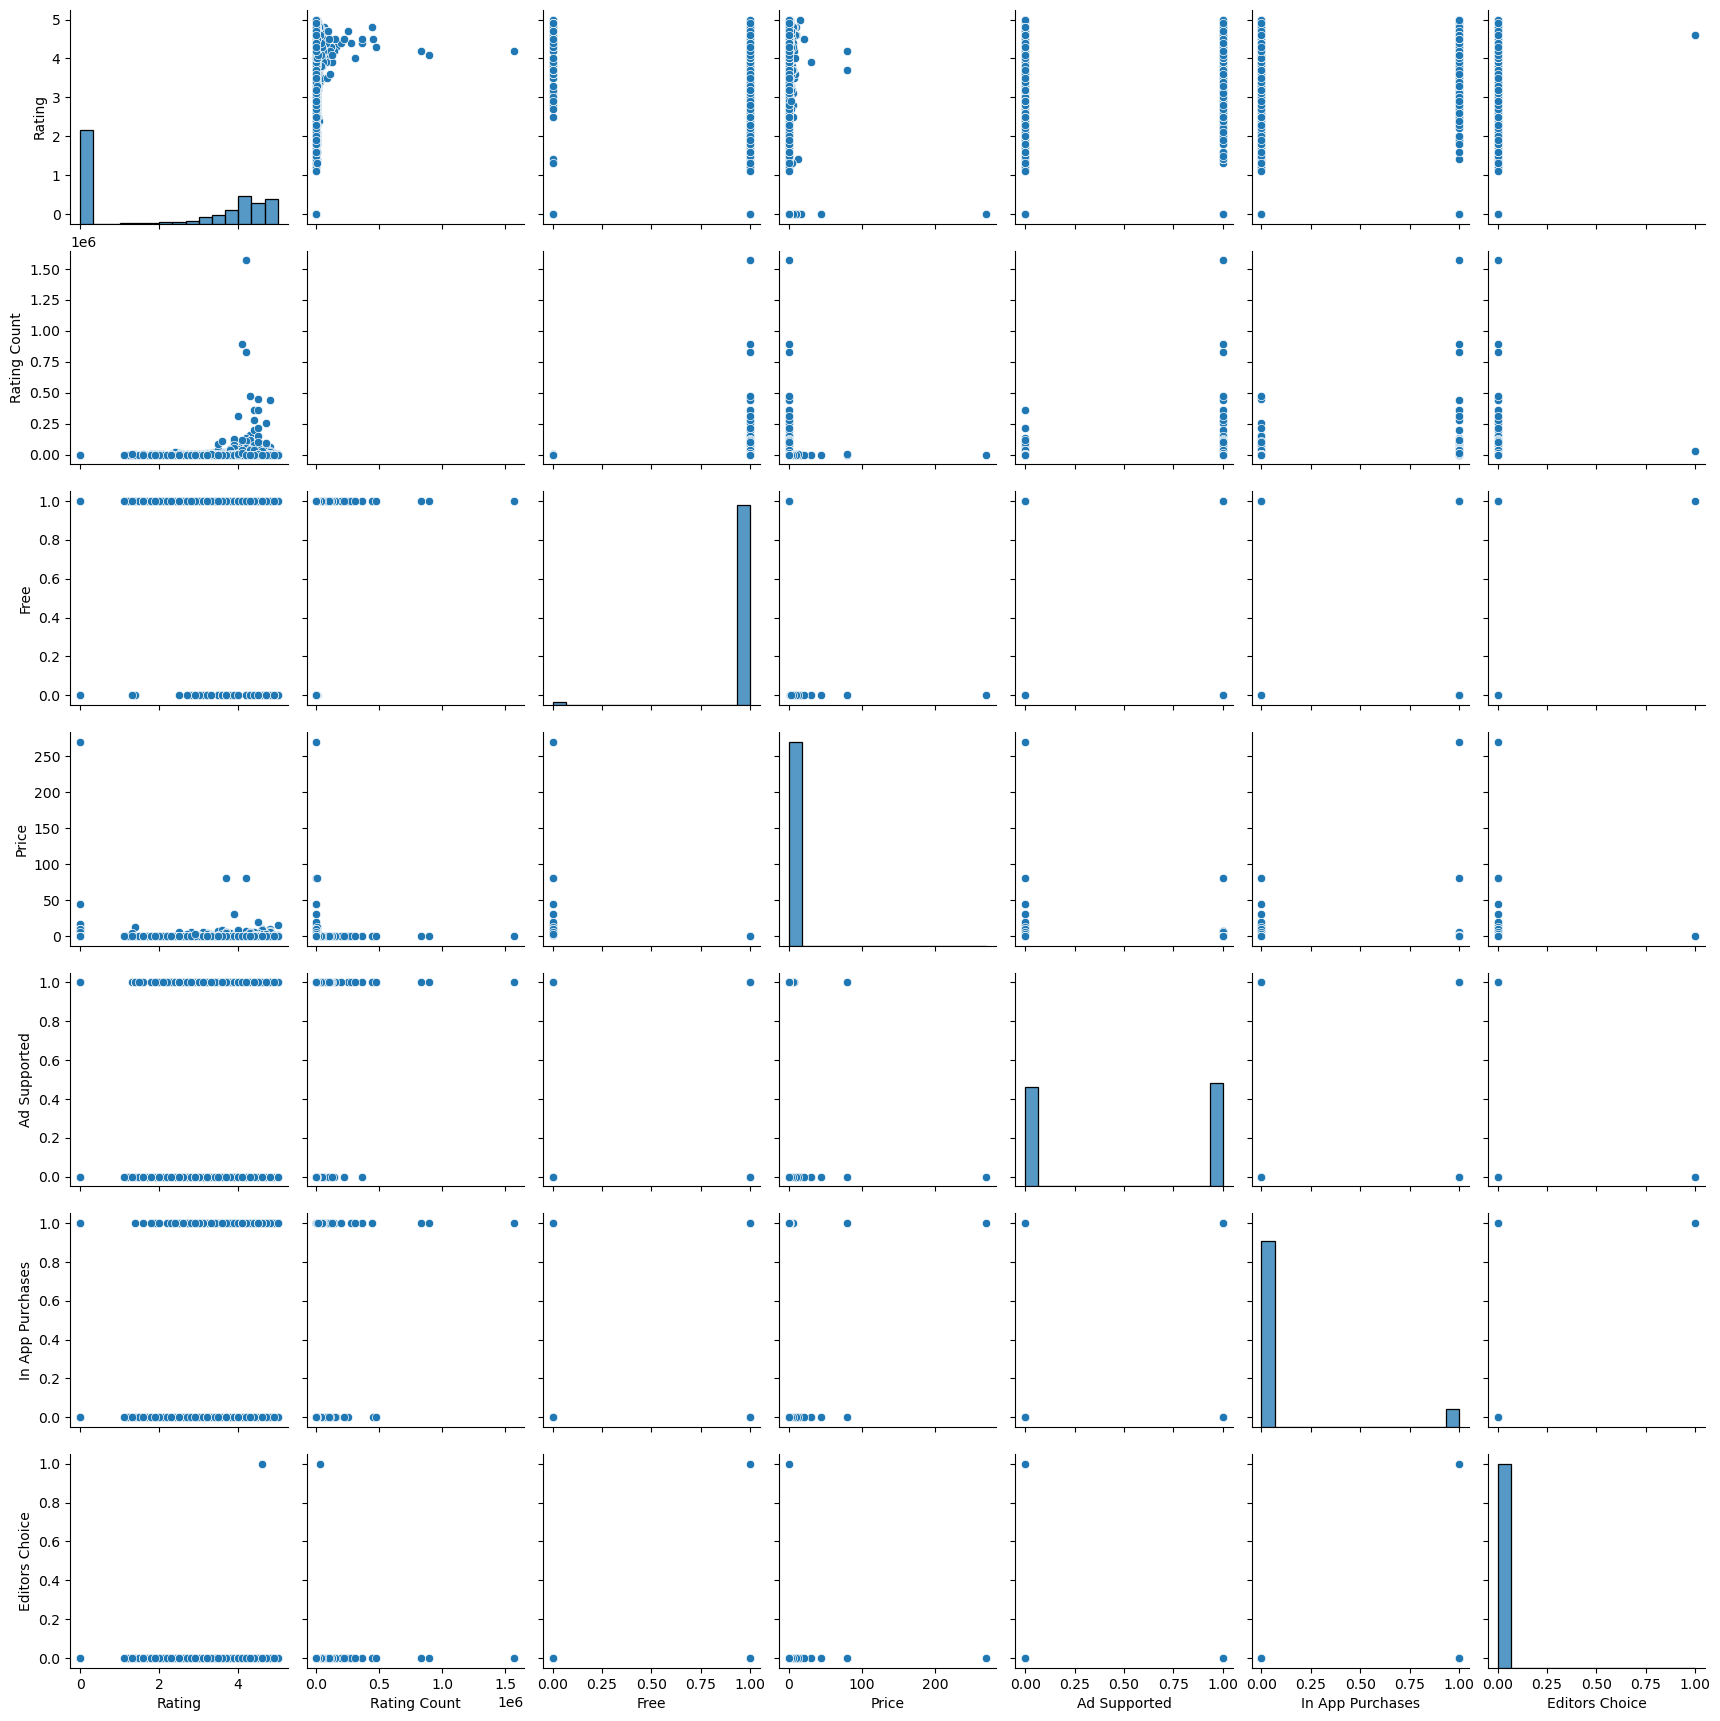

In [94]:
sns.pairplot(df_clean.select_dtypes(include=['int64','float']))

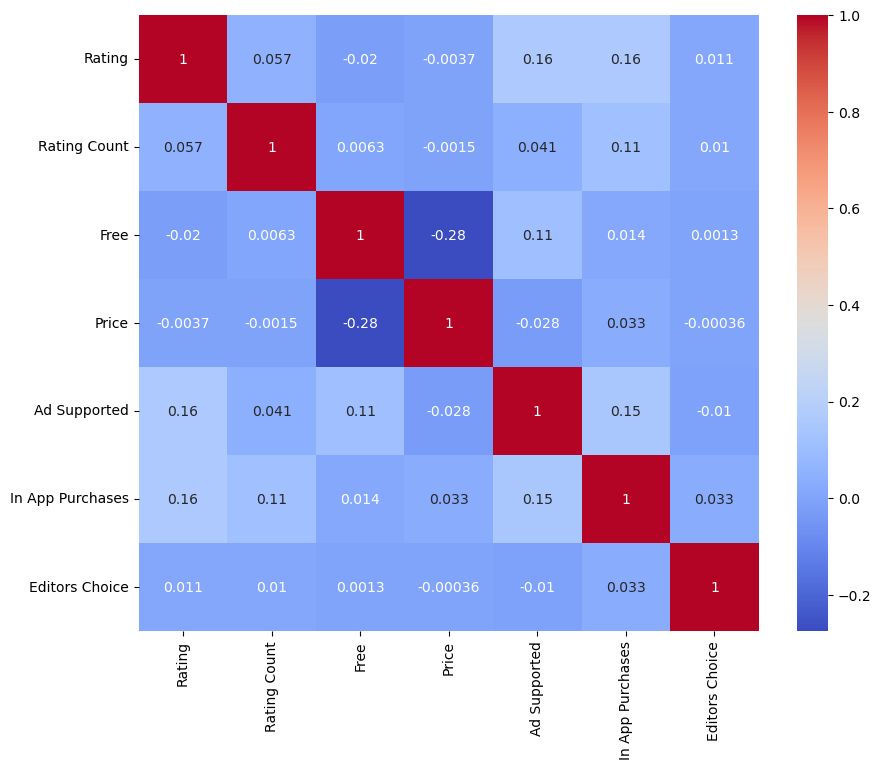

In [101]:
columns = ['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that our target variable Rating correlation is not really strong with the other columns.